In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("NSE-TATAGLOBAL.csv")

In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
df1 = df.reset_index()['Close']

In [6]:
df1.shape

(2035,)

In [7]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

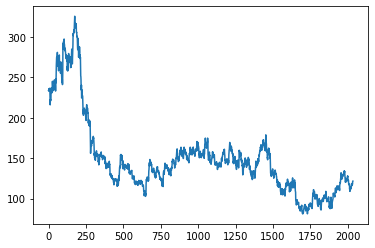

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
import numpy as np

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1.shape

(2035, 1)

In [12]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

# Training and Testing

In [13]:
#Spliting the dataset into train and test split 
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size

1322

In [15]:
test_size

713

In [16]:
len(train_data), len(test_data)

(1322, 713)

In [20]:
import numpy 
#convert an array of values into a dataset matrix 
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [21]:
#reshape unto X=t, t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train,y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data,time_step)

In [22]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]


In [23]:
print(X_test.shape), print(y_train.shape)

(612, 100)
(1221,)


(None, None)

In [42]:
#reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 14s 299ms/step - loss: 0.0290 - val_loss: 0.0058
Epoch 2/100
20/20 [==============================] - 5s 237ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 3/100
20/20 [==============================] - 4s 201ms/step - loss: 0.0027 - val_loss: 9.1740e-04
Epoch 4/100
20/20 [==============================] - 5s 246ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 6s 281ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 6s 322ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 7/100
20/20 [==============================] - 6s 320ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/100
20/20 [==============================] - 7s 334ms/step - loss: 0.0012 - val_loss: 9.6893e-04
Epoch 9/100
20/20 [==============================] - 6s 324ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/100
20/20 [==============================] - 6s 320ms/step - loss: 0.0012

20/20 [==============================] - 7s 330ms/step - loss: 3.9218e-04 - val_loss: 3.3040e-04
Epoch 77/100
20/20 [==============================] - 6s 310ms/step - loss: 3.8261e-04 - val_loss: 4.2851e-04
Epoch 78/100
20/20 [==============================] - 6s 314ms/step - loss: 3.6304e-04 - val_loss: 4.4058e-04
Epoch 79/100
20/20 [==============================] - 6s 306ms/step - loss: 3.8723e-04 - val_loss: 2.9206e-04
Epoch 80/100
20/20 [==============================] - 6s 320ms/step - loss: 3.4971e-04 - val_loss: 3.2025e-04
Epoch 81/100
20/20 [==============================] - 6s 320ms/step - loss: 3.4465e-04 - val_loss: 3.8806e-04
Epoch 82/100
20/20 [==============================] - 6s 313ms/step - loss: 3.2991e-04 - val_loss: 4.2662e-04
Epoch 83/100
20/20 [==============================] - 6s 304ms/step - loss: 5.3201e-04 - val_loss: 2.9302e-04
Epoch 84/100
20/20 [==============================] - 6s 313ms/step - loss: 3.6986e-04 - val_loss: 3.4034e-04
Epoch 85/100
20/20 [===

In [38]:
import tensorflow as tf

In [39]:
tf.__version__

'2.11.0'

In [43]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 1s 36ms/step


In [44]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [45]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

161.03716952311737

In [46]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

113.65050088363856

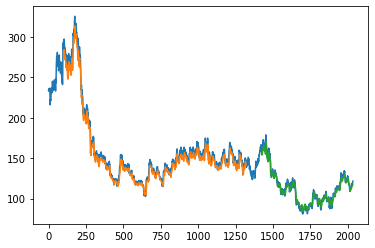

In [47]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [48]:
len(test_data)

713

In [49]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 372)

In [50]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [51]:
temp_input

[0.048815359477124176,
 0.048815359477124176,
 0.05310457516339867,
 0.049632352941176405,
 0.05065359477124176,
 0.05126633986928103,
 0.049632352941176405,
 0.05902777777777779,
 0.055555555555555525,
 0.040849673202614345,
 0.037377450980392135,
 0.037377450980392135,
 0.026552287581699308,
 0.02879901960784309,
 0.03165849673202614,
 0.03165849673202614,
 0.036356209150326724,
 0.022058823529411742,
 0.016748366013071836,
 0.014501633986928053,
 0.022263071895424813,
 0.03615196078431371,
 0.02675653594771238,
 0.03206699346405223,
 0.02696078431372545,
 0.035743464052287566,
 0.03594771241830064,
 0.0404411764705882,
 0.039215686274509776,
 0.044117647058823484,
 0.029820261437908446,
 0.012254901960784326,
 0.012867647058823484,
 0.011437908496731986,
 0.0024509803921567985,
 0.005923202614379064,
 0.0,
 0.007148692810457491,
 0.0042892156862744946,
 0.006740196078431349,
 0.006331699346405206,
 0.011233660130718914,
 0.019607843137254888,
 0.02757352941176472,
 0.030024509803921

In [52]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.04881536 0.05310458 0.04963235 0.05065359 0.05126634 0.04963235
 0.05902778 0.05555556 0.04084967 0.03737745 0.03737745 0.02655229
 0.02879902 0.0316585  0.0316585  0.03635621 0.02205882 0.01674837
 0.01450163 0.02226307 0.03615196 0.02675654 0.03206699 0.02696078
 0.03574346 0.03594771 0.04044118 0.03921569 0.04411765 0.02982026
 0.0122549  0.01286765 0.01143791 0.00245098 0.0059232  0.
 0.00714869 0.00428922 0.0067402  0.0063317  0.01123366 0.01960784
 0.02757353 0.03002451 0.03349673 0.04003268 0.04084967 0.03982843
 0.04166667 0.04370915 0.04758987 0.03594771 0.02839052 0.02410131
 0.01715686 0.01531863 0.01756536 0.02696078 0.02696078 0.03819444
 0.02839052 0.02369281 0.02920752 0.02328431 0.01919935 0.00653595
 0.00061275 0.00796569 0.01245915 0.01981209 0.01940359 0.02246732
 0.03125    0.02348856 0.0249183  0.02144608 0.04840686 0.04575163
 0.03962418 0.03921569 0.04758987 0.04513889 0.04166667 0.04125817
 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049  0.

ValueError: cannot reshape array of size 371 into shape (1,100,1)

In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [54]:
import matplotlib.pyplot as plt

In [55]:
len(df1)

2035

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

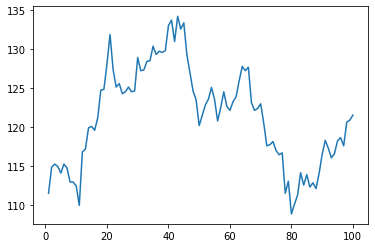

In [57]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))